In [1]:
from bs4 import BeautifulSoup
import time
import selenium
from selenium import webdriver
import pandas as pd
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options

In [2]:
# Specify the path to the Edge driver
edge_driver_path = r"msedgedriver.exe"

# Create a Service object
service = Service(executable_path=edge_driver_path)

# Create EdgeOptions object
options = Options()

# Initialize the WebDriver with the Service and Options objects
driver = webdriver.Edge(service=service, options=options)

# Open the desired webpage
driver.get('https://www.opindia.com/category/international/')


'<html lang="en-GB" class=" td-md-is-chrome"><head>\n<meta charset="UTF-8">\n<title>World Archives | OpIndia</title>\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="pingback" href="https://www.opindia.com/xmlrpc.php">\n<meta name="robots" content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1">\n<link rel="icon" type="image/png" href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png">\n\n<meta name="description" content="All articles in World category published on OpIndia">\n<link rel="canonical" href="https://www.opindia.com/category/international/">\n<link rel="next" href="https://www.opindia.com/category/international/page/2/">\n<meta property="og:locale" content="en_GB">\n<meta property="og:type" content="article">\n<meta property="og:title" content="World Archives | OpIndia">\n<meta property="og:description" content="All articles in World category published on OpIndia">\n<meta property="o
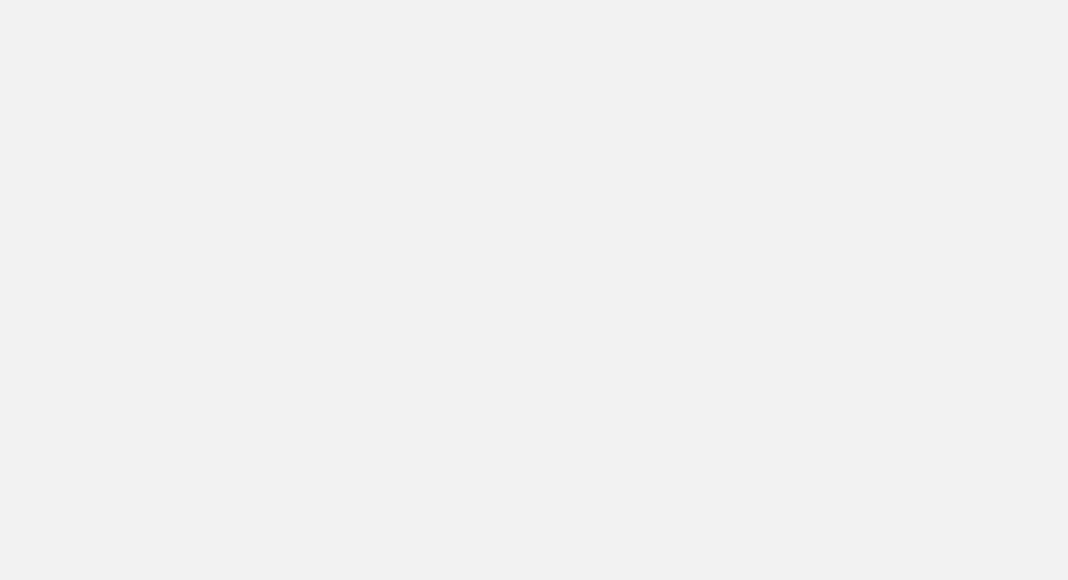

In [3]:
page = driver.page_source
page

In [4]:
soup = BeautifulSoup(page, 'html.parser')
divs = soup.find_all('div', class_='td-module-meta-info')

In [6]:
def func2(url):  
    edge_driver_path = r"msedgedriver.exe"
    service = Service(executable_path=edge_driver_path)
    
    # Create EdgeOptions object
    options = Options()
    
    # Initialize the WebDriver with the Service and Options objects
    driver = webdriver.Edge(service=service, options=options)
    try: 
        driver.get(url)
        page = driver.page_source
        ##print(page)
        time.sleep(1)
        soup = BeautifulSoup(page, 'html.parser')
        ##print(soup)
        title = soup.find("meta", property="og:title")['content']
        url = soup.find("meta", property="og:url")['content']
        des= soup.find("meta", property="og:description")['content']
        data_dict = {
            'Title': [title],
            'URL': [url],
            'Description': [des],
            'Keywords':'.'
        }
        df = pd.DataFrame(data_dict)
        try:
            existing_df = pd.read_csv('my_data.csv')
        except FileNotFoundError:
            existing_df = pd.DataFrame(columns=['Title','URL','Description','Keywords'])
        combined_df=pd.concat([df,existing_df], ignore_index=True)
        combined_df.to_csv('my_data.csv', index=False)
    except Exception as e:
        return
    finally:
        driver.quit()
        return

for div in divs:
    links = div.find_all('a', href=True)
    for link in links:
        func2(link['href'])

In [7]:
try:
    existing_df = pd.read_csv('my_data.csv')
except FileNotFoundError:
    existing_df = pd.DataFrame(columns=['Title','URL','Description','Keywords'])

In [8]:
existing_df.drop_duplicates(inplace=True)
existing_df.to_csv('my_data.csv', index=False)

In [9]:
existing_df

,Title,URL,Description,Keywords
0,3 Sons Of Russian Orthodox Priest Get Lengthy ...,https://www.rferl.org/a/three-sons-russian-ort...,The Second Western District Military Court in ...,"News, Russia, Russia Invades Ukraine"
1,New York City expands migrant debit card program,https://www.thecentersquare.com/new_york/artic...,(The Center Square) — New York City officials ...,"new_york, border"
2,Privacy Notice,https://www.voanews.com/p/5338.html,"Privacy notice for English website, Voice of A...","Voice of America, VOA, privacy notice"
3,The Inside Story - USA Votes 2024 | 151 TRANSC...,https://www.voanews.com/a/7683692.html,Transcript:\nThe Inside Story: USA Votes 2024\...,The Inside Story
4,Wisconsin Supreme Court to hear challenges to ...,https://www.thecentersquare.com/wisconsin/arti...,(The Center Square) – The Wisconsin Supreme Co...,"wisconsin, healthcare"
5,"Biden's White House spending dwarfs Trump, Obama",https://www.thecentersquare.com/issues/account...,(The Center Square) – President Joe Biden's Wh...,"accountability, national"
6,Transit ridership continues upward trend,https://www.thecentersquare.com/national/artic...,(The Center Square)- First-quarter ridership f...,national
7,Unplugged: Music in Crisis,http://prachataienglish.com/node/10264,"During the pandemic, Thai musicians and worker...","documentary,COVID-19,Covid-19 pandemic,Creativ..."
8,Royalist raising money to pray for princess’ r...,http://prachataienglish.com/node/10147,A monarchy supporter with a large online follo...,"Princess Bajrakitiyabha,Suvinai Pornavalai"
9,Opposition to APEC 2022,http://prachataienglish.com/node/10101,Thailand is currently hosting the APEC Economi...,"APEC,APEC 2022,Greenwashing,Bio-circular-green..."
